In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics as stt
import numpy as np

In [2]:
df = pd.read_csv("maskedconso.csv")
df[13:23]

,masked_id,masked_name,masked_designation,BR_or_HO,course_code,Category,Type,Credit Days,End Date,Year,Month
13,1,name1,Mgr,BR,14,MDM,IC,0.0,2018-03-10,2018,3
14,2,name2,Ctc,BR,3,Regulations,EL,0.4,2018-04-18,2018,4
15,2,name2,Ctc,BR,4,Regulations - Anti Money Laundering,EL,0.5,2018-10-25,2018,10
16,2,name2,Ctc,BR,5,Regulations - Anti Money Laundering,EL,0.8,2018-12-30,2018,12
17,2,name2,Ctc,BR,6,MDM - Leadership & Work Culture,EL,0.2,2018-12-30,2018,12
18,2,name2,Ctc,BR,8,IT and Office Automation,EL,0.1,2018-07-08,2018,7
19,2,name2,Ctc,BR,15,Regulations,IC,2.0,2018-03-30,2018,3
20,2,name2,Ctc,BR,13,Regulations,EL,0.3,2018-04-18,2018,4
21,3,name3,Ctc,BR,3,Regulations,EL,0.4,2018-03-13,2018,3
22,3,name3,Ctc,BR,4,Regulations - Anti Money Laundering,EL,0.5,2018-10-10,2018,10


In [3]:
mask_2018 = df["Year"] == 2018
df[mask_2018].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12420 entries, 0 to 12419
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   masked_id           12420 non-null  int64  
 1   masked_name         12420 non-null  object 
 2   masked_designation  12420 non-null  object 
 3   BR_or_HO            12420 non-null  object 
 4   course_code         12420 non-null  int64  
 5   Category            12420 non-null  object 
 6   Type                12420 non-null  object 
 7   Credit Days         12420 non-null  float64
 8   End Date            12420 non-null  object 
 9   Year                12420 non-null  int64  
 10  Month               12420 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


In [4]:
mask_2019 = df["Year"] == 2019
df[mask_2019].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17910 entries, 12420 to 30329
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   masked_id           17910 non-null  int64  
 1   masked_name         17910 non-null  object 
 2   masked_designation  17910 non-null  object 
 3   BR_or_HO            17910 non-null  object 
 4   course_code         17910 non-null  int64  
 5   Category            17910 non-null  object 
 6   Type                17910 non-null  object 
 7   Credit Days         17910 non-null  float64
 8   End Date            17910 non-null  object 
 9   Year                17910 non-null  int64  
 10  Month               17910 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


In [5]:
mask_2020 = df["Year"] == 2020
df[mask_2020].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28840 entries, 30330 to 59169
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   masked_id           28840 non-null  int64  
 1   masked_name         28840 non-null  object 
 2   masked_designation  28840 non-null  object 
 3   BR_or_HO            28840 non-null  object 
 4   course_code         28840 non-null  int64  
 5   Category            28840 non-null  object 
 6   Type                28840 non-null  object 
 7   Credit Days         28840 non-null  float64
 8   End Date            28840 non-null  object 
 9   Year                28840 non-null  int64  
 10  Month               28840 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.6+ MB


In [6]:
df_18 = df[mask_2018]
df_19 = df[mask_2019]
df_20 = df[mask_2020]

print('Total number of uniqe staff ...')
print(f"2018 = {len(df_18['masked_id'].unique())}")
print(f"2019 = {len(df_19['masked_id'].unique())}")
print(f"2020 = {len(df_20['masked_id'].unique())}")

Total number of uniqe staff ...
2018 = 995
2019 = 996
2020 = 996


# Compile total training day per staff per year into a dictionary

In [7]:
yearly_training_data = {}

for y in [2018,2019,2020]:
    
    mask = df["Year"] == y

    individual_training_days = []

    i = 0

    while i < len(df[mask]['masked_id'].unique()):
        current_id = df[mask]['masked_id'] == df[mask]['masked_id'].unique()[i]
        individual_training_days.append(round(df[mask].loc[current_id,'Credit Days'].sum(),1))
        i+=1
    
    yearly_training_data[y] = individual_training_days

# Calculate average Training Days per staff for 2018, 2019 & 2020 based on user selection

In [8]:
year = input("Please key in year (2018, 2019 or 2020) :")

mask = df["Year"] == int(year)

print(f"In {year}, on average each staff attended {round(df[mask]['Credit Days'].sum()/len(df[mask]['masked_id'].unique()),1)} days of training")

Please key in year (2018, 2019 or 2020) :2020
In 2020, on average each staff attended 9.9 days of training


# Check the distribution of training days per staff for each year based on user selection

Please key in year (2018, 2019 or 2020) : 2019
Key in another year for comparison (2018, 2019, 2020) or press enter to proceed without comparison : 2018

Lowest training day per staff in 2019 = 0.2  (2018 : 0.4)
Median training day per staff in 2019 = 8.4  (2018 : 7.3)
Average training day per staff in 2019 = 9.3  (2018 : 8.3)
Highest training day per staff in 2019 = 30.5  (2018 : 27.3)



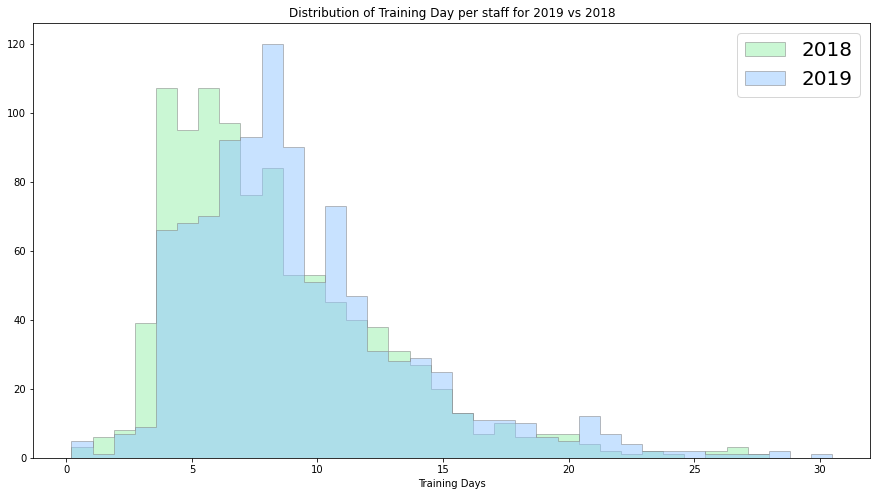

In [10]:
year, compare = 0, 0
year = int(input("Please key in year (2018, 2019 or 2020) : "))
try:
    compare = int(input("Key in another year for comparison (2018, 2019, 2020) or press enter to proceed without comparison : "))
except:
    pass

try:
    
    print(f"\nLowest training day per staff in {year} = {round(min(yearly_training_data[year]),1)}  ({compare} : {round(min(yearly_training_data[compare]),1)})")
    print(f"Median training day per staff in {year} = {round(stt.median(yearly_training_data[year]),1)}  ({compare} : {round(stt.median(yearly_training_data[compare]),1)})")
    print(f"Average training day per staff in {year} = {round(stt.mean(yearly_training_data[year]),1)}  ({compare} : {round(stt.mean(yearly_training_data[compare]),1)})")
    print(f"Highest training day per staff in {year} = {round(max(yearly_training_data[year]),1)}  ({compare} : {round(max(yearly_training_data[compare]),1)})\n")

    plt.style.use("seaborn-pastel")
    plt.rc('figure', figsize=(15,8))

    plt.hist([yearly_training_data[year],yearly_training_data[compare]], bins = 'auto', edgecolor = 'grey', histtype = 'stepfilled', alpha=0.5, label=[year,compare])
    plt.xlabel("Training Days")
    plt.legend(loc='upper right',fontsize=20)
    plt.title(f"Distribution of Training Day per staff for {year} vs {compare}")
    plt.show()
    
except:

    print(f"\nLowest training day per staff in {year} = {round(min(yearly_training_data[year]),1)}")
    print(f"Median training day per staff in {year} = {round(stt.median(yearly_training_data[year]),1)}")
    print(f"Average training day per staff in {year} = {round(stt.mean(yearly_training_data[year]),1)}")
    print(f"Highest training day per staff in {year} = {round(max(yearly_training_data[year]),1)}\n")

    plt.style.use("seaborn-pastel")
    plt.rc('figure', figsize=(15,8))

    plt.hist(yearly_training_data[year], bins = 'auto', edgecolor = 'grey', histtype = 'stepfilled', alpha=0.5, label=year)
    plt.xlabel("Training Days")
    plt.legend(loc='upper right',fontsize=20)
    plt.title(f"Distribution of Training Day per staff for {year}")
    plt.show()


# Average Training Day per staff by Designation

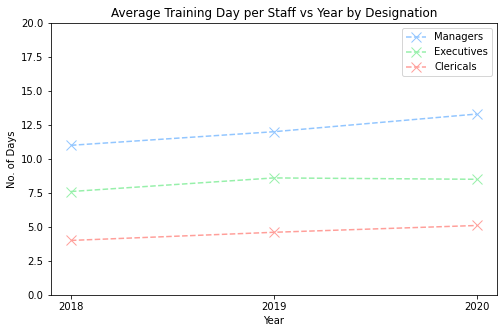

Manager = [2018: 11.0, 2019: 12.0, 2020: 13.3]
Executives = [2018: 7.6, 2019: 8.6, 2020: 8.5]
Clericals = [2018: 4.0, 2019: 4.6, 2020: 5.1]


In [11]:
mask_mgr = df["masked_designation"] == 'Mgr'
mask_exc = df["masked_designation"] == 'Exc'
mask_ctc = df["masked_designation"] == 'Ctc'


average_mgr18 = round(df[mask_mgr & mask_2018]['Credit Days'].sum()/len(df[mask_mgr & mask_2018]['masked_id'].unique()),1)
average_mgr19 = round(df[mask_mgr & mask_2019]['Credit Days'].sum()/len(df[mask_mgr & mask_2019]['masked_id'].unique()),1)
average_mgr20 = round(df[mask_mgr & mask_2020]['Credit Days'].sum()/len(df[mask_mgr & mask_2020]['masked_id'].unique()),1)

average_exc18 = round(df[mask_exc & mask_2018]['Credit Days'].sum()/len(df[mask_exc & mask_2018]['masked_id'].unique()),1)
average_exc19 = round(df[mask_exc & mask_2019]['Credit Days'].sum()/len(df[mask_exc & mask_2019]['masked_id'].unique()),1)
average_exc20 = round(df[mask_exc & mask_2020]['Credit Days'].sum()/len(df[mask_exc & mask_2020]['masked_id'].unique()),1)

average_ctc18 = round(df[mask_ctc & mask_2018]['Credit Days'].sum()/len(df[mask_ctc & mask_2018]['masked_id'].unique()),1)
average_ctc19 = round(df[mask_ctc & mask_2019]['Credit Days'].sum()/len(df[mask_ctc & mask_2019]['masked_id'].unique()),1)
average_ctc20 = round(df[mask_ctc & mask_2020]['Credit Days'].sum()/len(df[mask_ctc & mask_2020]['masked_id'].unique()),1)



year_x = ['2018', '2019', '2020']

plt.rc('figure', figsize=(8,5))
plt.plot(year_x, [average_mgr18, average_mgr19, average_mgr20], label="Managers", marker = 'x', ms = 10, ls = '--')
plt.plot(year_x, [average_exc18, average_exc19, average_exc20], label="Executives", marker = 'x', ms = 10, ls = '--')
plt.plot(year_x, [average_ctc18, average_ctc19, average_ctc20], label="Clericals", marker = 'x', ms = 10, ls = '--')
plt.ylim(0,20)
plt.xlabel("Year")
plt.ylabel("No. of Days")
plt.title("Average Training Day per Staff vs Year by Designation")
plt.legend(loc="upper right")
plt.show()


print(f"Manager = [2018: {average_mgr18}, 2019: {average_mgr19}, 2020: {average_mgr20}]")
print(f"Executives = [2018: {average_exc18}, 2019: {average_exc19}, 2020: {average_exc20}]")
print(f"Clericals = [2018: {average_ctc18}, 2019: {average_ctc19}, 2020: {average_ctc20}]")

# Bankwide Annual Breakdown of Total Training Days by Type
    IC = Internal Classroom, EL = e-Learning, DL = Digital Learning, EC = External Courses

In [12]:
mask_IC = df['Type'] == "IC"
mask_EL = df['Type'] == "EL"
mask_DL = df['Type'] == "DL"
mask_EC = df['Type'] == "EC"

IC_2018 = round(df[mask_2018 & mask_IC]['Credit Days'].sum()/df[mask_2018]['Credit Days'].sum()*100,1)
EL_2018 = round(df[mask_2018 & mask_EL]['Credit Days'].sum()/df[mask_2018]['Credit Days'].sum()*100,1)
DL_2018 = round(df[mask_2018 & mask_DL]['Credit Days'].sum()/df[mask_2018]['Credit Days'].sum()*100,1)
EC_2018 = round(df[mask_2018 & mask_EC]['Credit Days'].sum()/df[mask_2018]['Credit Days'].sum()*100,1)

IC_2019 = round(df[mask_2019 & mask_IC]['Credit Days'].sum()/df[mask_2019]['Credit Days'].sum()*100,1)
EL_2019 = round(df[mask_2019 & mask_EL]['Credit Days'].sum()/df[mask_2019]['Credit Days'].sum()*100,1)
DL_2019 = round(df[mask_2019 & mask_DL]['Credit Days'].sum()/df[mask_2019]['Credit Days'].sum()*100,1)
EC_2019 = round(df[mask_2019 & mask_EC]['Credit Days'].sum()/df[mask_2019]['Credit Days'].sum()*100,1)

IC_2020 = round(df[mask_2020 & mask_IC]['Credit Days'].sum()/df[mask_2020]['Credit Days'].sum()*100,1)
EL_2020 = round(df[mask_2020 & mask_EL]['Credit Days'].sum()/df[mask_2020]['Credit Days'].sum()*100,1)
DL_2020 = round(df[mask_2020 & mask_DL]['Credit Days'].sum()/df[mask_2020]['Credit Days'].sum()*100,1)
EC_2020 = round(df[mask_2020 & mask_EC]['Credit Days'].sum()/df[mask_2020]['Credit Days'].sum()*100,1)


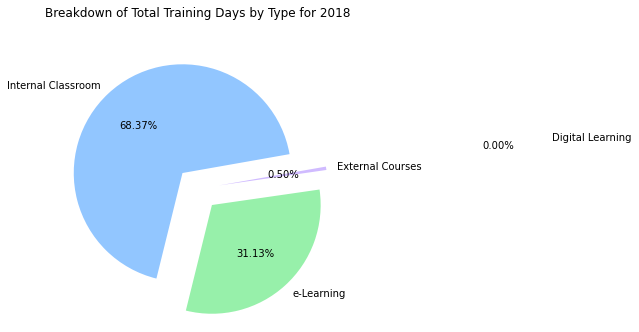

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


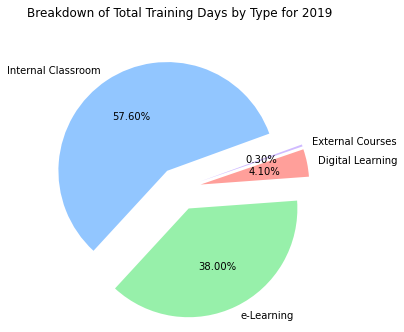

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


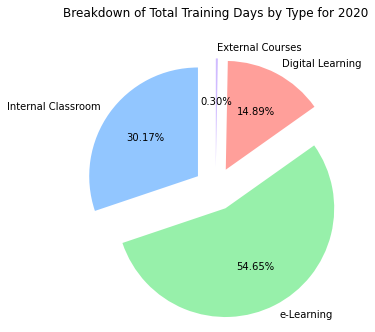

In [13]:
pie_labels = ["Internal Classroom", "e-Learning", "Digital Learning", "External Courses"]
plt.rc('figure', figsize=(8,5))

slices_2018 = [IC_2018, EL_2018, DL_2018, EC_2018]

explode = [0.2, 0.2, 2.2, 0.2]
plt.pie(slices_2018, labels= pie_labels, explode= explode, autopct= "%1.2f%%", startangle=10)
plt.title(f"Breakdown of Total Training Days by Type for 2018\n\n")
plt.show()

print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
slices_2019 = [IC_2019, EL_2019, DL_2019, EC_2019]

explode = [0.2, 0.2, 0.2, 0.2]
plt.pie(slices_2019, labels= pie_labels, explode= explode, autopct= "%1.2f%%", startangle=20)
plt.title(f"Breakdown of Total Training Days by Type for 2019\n\n")
plt.show()

print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
slices_2020 = [IC_2020, EL_2020, DL_2020, EC_2020]

explode = [0.2, 0.2, 0.2, 0.2]
plt.pie(slices_2020, labels= pie_labels, explode= explode, autopct= "%1.2f%%", startangle=90)
plt.title(f"Breakdown of Total Training Days by Type for 2020\n\n")
plt.show()

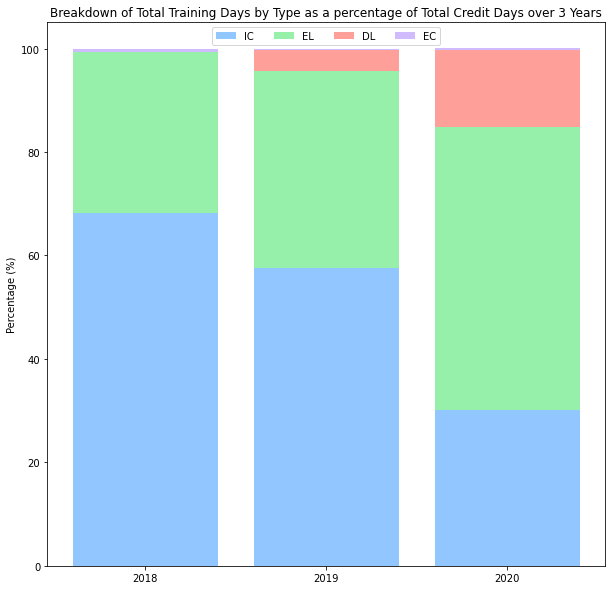

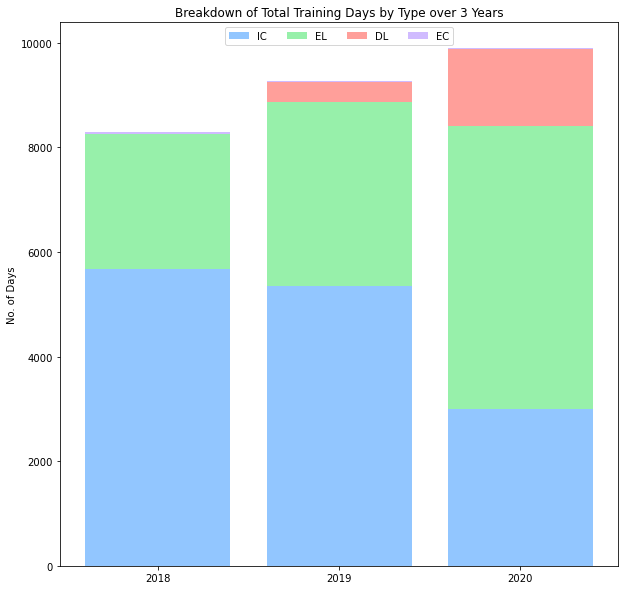


Data for above Bar chart:


,2018,2019,2020
No. of Days for IC,5671.8 (68.3%),5341.0 (57.6%),2989.9 (30.2%)
No. of Days for EL,2582.4 (31.1%),3525.7 (38.0%),5408.7 (54.7%)
No. of Days for DL,0.0 (0.0%),378.0 (4.1%),1470.7 (14.9%)
No. of Days for EC,44.0 (0.5%),29.0 (0.3%),26.0 (0.3%)
Total Days,8298.2 (100%),9273.7 (100%),9895.3 (100%)


In [14]:
stb_labels = ['2018', '2019', '2020']

IC_3y = [IC_2018, IC_2019, IC_2020]
EL_3y = [EL_2018, EL_2019, EL_2020]
DL_3y = [DL_2018, DL_2019, DL_2020]
EC_3y = [EC_2018, EC_2019, EC_2020]

bar1 = np.add(IC_3y, EL_3y).tolist()
bar2 = np.add(bar1, DL_3y).tolist()

plt.rc('figure', figsize=(10,10))
plt.bar(stb_labels,IC_3y)
plt.bar(stb_labels,EL_3y, bottom=IC_3y)
plt.bar(stb_labels,DL_3y, bottom=bar1)
plt.bar(stb_labels,EC_3y, bottom=bar2)
plt.title("Breakdown of Total Training Days by Type as a percentage of Total Credit Days over 3 Years")
plt.legend(['IC','EL','DL','EC'], loc="upper center", ncol=4)
plt.ylabel("Percentage (%)")
plt.show()

IC_3y_day = [df[mask_2018 & mask_IC]['Credit Days'].sum(), df[mask_2019 & mask_IC]['Credit Days'].sum(), df[mask_2020 & mask_IC]['Credit Days'].sum()]
EL_3y_day = [df[mask_2018 & mask_EL]['Credit Days'].sum(), df[mask_2019 & mask_EL]['Credit Days'].sum(), df[mask_2020 & mask_EL]['Credit Days'].sum()]
DL_3y_day = [df[mask_2018 & mask_DL]['Credit Days'].sum(), df[mask_2019 & mask_DL]['Credit Days'].sum(), df[mask_2020 & mask_DL]['Credit Days'].sum()]
EC_3y_day = [df[mask_2018 & mask_EC]['Credit Days'].sum(), df[mask_2019 & mask_EC]['Credit Days'].sum(), df[mask_2020 & mask_EC]['Credit Days'].sum()]

bar1day = np.add(IC_3y_day, EL_3y_day).tolist()
bar2day = np.add(bar1day, DL_3y_day).tolist()

plt.rc('figure', figsize=(10,10))
plt.bar(stb_labels,IC_3y_day)
plt.bar(stb_labels,EL_3y_day, bottom=IC_3y_day)
plt.bar(stb_labels,DL_3y_day, bottom=bar1day)
plt.bar(stb_labels,EC_3y_day, bottom=bar2day)
plt.title("Breakdown of Total Training Days by Type over 3 Years")
plt.legend(['IC','EL','DL','EC'], loc="upper center", ncol=4)
plt.ylabel("No. of Days")
plt.show()

table_data = {
    2018: [f"{df[mask_2018 & mask_IC]['Credit Days'].sum()}  ({IC_2018}%)", f"{df[mask_2018 & mask_EL]['Credit Days'].sum()}  ({EL_2018}%)", f"{df[mask_2018 & mask_DL]['Credit Days'].sum()}  ({DL_2018}%)", f"{df[mask_2018 & mask_EC]['Credit Days'].sum()}  ({EC_2018}%)", f"{df[mask_2018]['Credit Days'].sum()}  (100%)"],
    2019: [f"{df[mask_2019 & mask_IC]['Credit Days'].sum()}  ({IC_2019}%)", f"{df[mask_2019 & mask_EL]['Credit Days'].sum()}  ({EL_2019}%)", f"{df[mask_2019 & mask_DL]['Credit Days'].sum()}  ({DL_2019}%)", f"{df[mask_2019 & mask_EC]['Credit Days'].sum()}  ({EC_2019}%)", f"{df[mask_2019]['Credit Days'].sum()}  (100%)"],    
    2020: [f"{df[mask_2020 & mask_IC]['Credit Days'].sum()}  ({IC_2020}%)", f"{df[mask_2020 & mask_EL]['Credit Days'].sum()}  ({EL_2020}%)", f"{round(df[mask_2020 & mask_DL]['Credit Days'].sum(),1)}  ({DL_2020}%)", f"{df[mask_2020 & mask_EC]['Credit Days'].sum()}  ({EC_2020}%)", f"{df[mask_2020]['Credit Days'].sum()}  (100%)"]

}

table = pd.DataFrame(table_data, index=['No. of Days for IC','No. of Days for EL','No. of Days for DL','No. of Days for EC', 'Total Days'])
print(f"\nData for above Bar chart:" )
table

# End of Project
